In [ ]:
import pandas as pd
import pickle
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE

# Load labeled dataset
df = pd.read_csv("labeled_thermal_features.csv")

# Separate features (X) and labels (y)
X = df.drop(columns=["Frame", "Porosity Label"])  # Exclude 'Frame' (not useful for training)
y = df["Porosity Label"]

# Split data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Apply SMOTE to balance dataset
smote = SMOTE(sampling_strategy=0.2, random_state=42)  # Increase anomalies to 20% of normal samples
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Initialize Random Forest Classifier
rf_classifier = RandomForestClassifier(
    n_estimators=200,  
    max_depth=5,  
    min_samples_split=5, 
    min_samples_leaf=2,  
    max_features="sqrt",  
    class_weight="balanced",  
    random_state=42,
    n_jobs=-1  
)

# Train the model
rf_classifier.fit(X_train_resampled, y_train_resampled)

# Make predictions
y_pred = rf_classifier.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Print evaluation results
print("\nRandom Forest Model Evaluation:")
print(f"Accuracy: {accuracy:.10f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(classification_rep)

# Save the trained model
with open("random_forest_anomaly_model.pkl", "wb") as model_file:
    pickle.dump(rf_classifier, model_file)

print("✅ Random Forest model saved as 'random_forest_anomaly_model.pkl'.")



Random Forest Model Evaluation:
Accuracy: 0.9968051118
Confusion Matrix:
[[299   0]
 [  1  13]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       299
           1       1.00      0.93      0.96        14

    accuracy                           1.00       313
   macro avg       1.00      0.96      0.98       313
weighted avg       1.00      1.00      1.00       313

✅ Random Forest model saved as 'random_forest_anomaly_model.pkl'.


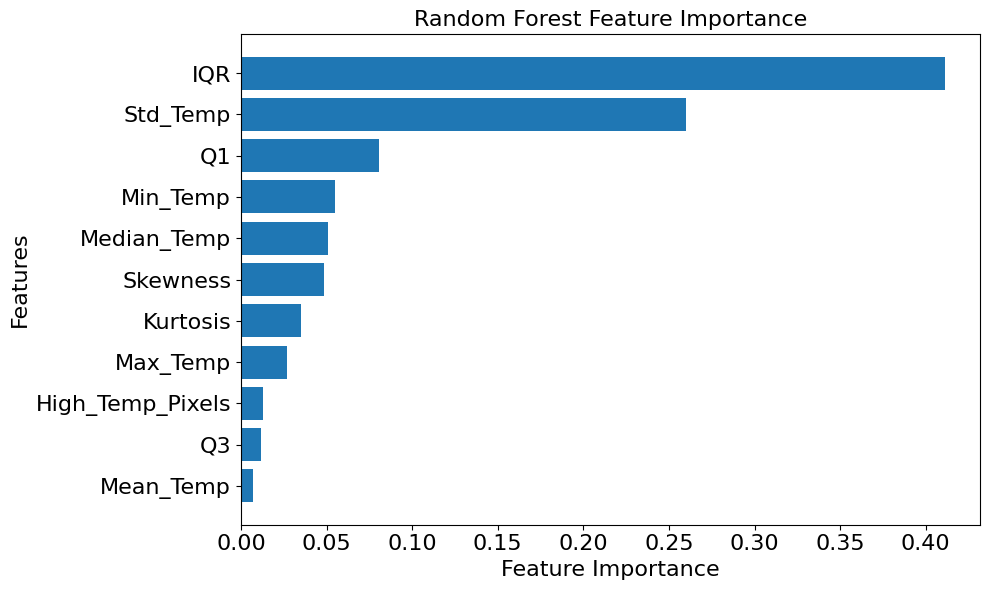

In [13]:
import matplotlib.pyplot as plt
import numpy as np

# Özellik önemleri ve isimleri
feature_importance = rf_classifier.feature_importances_
feature_names = X_train.columns

# Azalan sıraya göre sıralama
sorted_idx = np.argsort(feature_importance)[::-1]
sorted_features = feature_names[sorted_idx]
sorted_importance = feature_importance[sorted_idx]

# Grafik çizimi
plt.figure(figsize=(10, 6))
plt.barh(sorted_features, sorted_importance)

# Axis and title with larger font sizes
plt.xlabel("Feature Importance", fontsize=16)
plt.ylabel("Features", fontsize=16)
plt.title("Random Forest Feature Importance", fontsize=16)

# Tick labels larger
plt.tick_params(axis='y', labelsize=16)
plt.tick_params(axis='x', labelsize=16)

# En önemli özelliği en üstte göster
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()
